In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from scipy import stats


*Loading Dataset*

In [2]:
df = pd.read_csv("atlantis_citizens_final.csv")

In [3]:
df.head() 

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2


*Basic Description*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Citizen_ID        15751 non-null  object 
 1   Diet_Type         15751 non-null  object 
 2   District_Name     15751 non-null  object 
 3   Occupation        15751 non-null  object 
 4   Wealth_Index      14696 non-null  float64
 5   House_Size_sq_ft  14554 non-null  float64
 6   Life_Expectancy   15137 non-null  float64
 7   Vehicle_Owned     15751 non-null  object 
 8   Work_District     15751 non-null  object 
 9   Bio_Hash          15751 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [5]:
df.describe()


,Wealth_Index,House_Size_sq_ft,Life_Expectancy
count,14696.000000,14554.000000,15137.000000
mean,9529.708628,1417.153772,51.913391
std,20502.182375,2233.194323,16.567063
min,1000.000000,100.000000,20.000000
25%,1978.000000,205.000000,40.000000
50%,3794.500000,477.000000,49.000000
75%,8951.500000,1470.750000,60.000000
max,589377.000000,10000.000000,110.000000


In [6]:
df.shape

(15751, 10)

In [7]:
df.columns

Index(['Citizen_ID', 'Diet_Type', 'District_Name', 'Occupation',
       'Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy', 'Vehicle_Owned',
       'Work_District', 'Bio_Hash'],
      dtype='object')

In [8]:
df.dtypes

Citizen_ID           object
Diet_Type            object
District_Name        object
Occupation           object
Wealth_Index        float64
House_Size_sq_ft    float64
Life_Expectancy     float64
Vehicle_Owned        object
Work_District        object
Bio_Hash             object
dtype: object

*Duplicated Data*

In [9]:
df.nunique()

Citizen_ID          15751
Diet_Type               3
District_Name           4
Occupation              5
Wealth_Index         8358
House_Size_sq_ft     3443
Life_Expectancy        91
Vehicle_Owned           5
Work_District           4
Bio_Hash            15751
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

*Missing values Calculation*

In [11]:
df.isnull().sum()

Citizen_ID             0
Diet_Type              0
District_Name          0
Occupation             0
Wealth_Index        1055
House_Size_sq_ft    1197
Life_Expectancy      614
Vehicle_Owned          0
Work_District          0
Bio_Hash               0
dtype: int64

In [12]:
(df.isnull().sum()/(len(df)))*100

Citizen_ID          0.000000
Diet_Type           0.000000
District_Name       0.000000
Occupation          0.000000
Wealth_Index        6.697987
House_Size_sq_ft    7.599517
Life_Expectancy     3.898165
Vehicle_Owned       0.000000
Work_District       0.000000
Bio_Hash            0.000000
dtype: float64

*Filling Missing Values with Median*

In [13]:
num_cols = ['Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy', 'Commute_Out_Percent']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

*Dropping Non-Informative and Leakage Feature*

In [14]:
df_fe = df.drop(columns=['Citizen_ID', 'Bio_Hash'])
df_fe.head()

,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District
0,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza
1,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench
2,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench
3,Exotic Imports,Deep Trench,Fisher,3794.5,136.0,38.0,Fin Bicycle,Deep Trench
4,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench


*Mobility Feature Engineering*

In [15]:
df_fe['Commutes_Out'] = (
    df_fe['District_Name'] != df_fe['Work_District']
).astype(int)

df_fe = df_fe.drop(columns=['Work_District'])
df_fe.head()


,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Commutes_Out
0,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,1
1,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,1
2,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,1
3,Exotic Imports,Deep Trench,Fisher,3794.5,136.0,38.0,Fin Bicycle,0
4,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,0


*Wealth Based Features*

In [16]:
df_fe['Wealth_Category'] = pd.qcut(
    df_fe['Wealth_Index'],
    q=4,
    labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High']
)

df_fe['Wealth_per_sqft'] = df_fe['Wealth_Index'] / df_fe['House_Size_sq_ft']

df_fe.head()

,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Commutes_Out,Wealth_Category,Wealth_per_sqft
0,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,1,Low,14.910000
1,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,1,Low,15.960000
2,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,1,Upper-Mid,7.356473
3,Exotic Imports,Deep Trench,Fisher,3794.5,136.0,38.0,Fin Bicycle,0,Lower-Mid,27.900735
4,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,0,High,9.721287


*Health and Housing Interaction Features*

In [17]:
df_fe['Life_per_Wealth'] = df_fe['Life_Expectancy'] / df_fe['Wealth_Index']
df_fe.head()

,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Commutes_Out,Wealth_Category,Wealth_per_sqft,Life_per_Wealth
0,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,1,Low,14.910000,0.028169
1,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,1,Low,15.960000,0.030702
2,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,1,Upper-Mid,7.356473,0.009436
3,Exotic Imports,Deep Trench,Fisher,3794.5,136.0,38.0,Fin Bicycle,0,Lower-Mid,27.900735,0.010014
4,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,0,High,9.721287,0.002078


*District-Level Relative Features*

In [18]:
district_avg_wealth = df_fe.groupby('District_Name')['Wealth_Index'].transform('mean')
df_fe['Relative_Wealth'] = df_fe['Wealth_Index'] - district_avg_wealth

df_fe.head()

,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Commutes_Out,Wealth_Category,Wealth_per_sqft,Life_per_Wealth,Relative_Wealth
0,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,1,Low,14.910000,0.028169,-1909.107166
1,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,1,Low,15.960000,0.030702,-1804.107166
2,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,1,Upper-Mid,7.356473,0.009436,-4310.445157
3,Exotic Imports,Deep Trench,Fisher,3794.5,136.0,38.0,Fin Bicycle,0,Lower-Mid,27.900735,0.010014,-939.650234
4,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,0,High,9.721287,0.002078,21250.849766


*Encoding Categorical Values*

In [19]:
categorical_cols = [
    'Diet_Type',
    'District_Name',
    'Vehicle_Owned',
    'Wealth_Category'
]

df_fe_encoded = pd.get_dummies(
    df_fe,
    columns=categorical_cols,
    drop_first=True
)

df_fe_encoded.head()


,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Commutes_Out,Wealth_per_sqft,Life_per_Wealth,Relative_Wealth,Diet_Type_Seafood,Diet_Type_Seaweed,District_Name_Deep Trench,District_Name_Mariana Plaza,District_Name_The Golden Reef,Vehicle_Owned_No Vehicle,Vehicle_Owned_Royal Submarine,Vehicle_Owned_Sea Scooter,Vehicle_Owned_Submarine,Wealth_Category_Lower-Mid,Wealth_Category_Upper-Mid,Wealth_Category_High
0,Scribe,1491.0,100.0,42.0,1,14.910000,0.028169,-1909.107166,False,False,False,False,False,False,False,False,False,False,False,False
1,Fisher,1596.0,100.0,49.0,1,15.960000,0.030702,-1804.107166,True,False,False,False,False,False,False,True,False,False,False,False
2,Warrior,3921.0,533.0,37.0,1,7.356473,0.009436,-4310.445157,True,False,False,True,False,False,False,True,False,False,True,False
3,Fisher,3794.5,136.0,38.0,0,27.900735,0.010014,-939.650234,False,False,True,False,False,False,False,False,False,True,False,False
4,Warrior,25985.0,2673.0,54.0,0,9.721287,0.002078,21250.849766,False,True,True,False,False,False,False,True,False,False,False,True


*Feature Scaling*

In [20]:
num_cols = [
    'Wealth_Index',
    'House_Size_sq_ft',
    'Life_Expectancy',
    'Wealth_per_sqft',
    'Life_per_Wealth',
    'Relative_Wealth'
]

scaler = StandardScaler()
df_fe_encoded[num_cols] = scaler.fit_transform(df_fe_encoded[num_cols])

df_fe_encoded.head()



,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Commutes_Out,Wealth_per_sqft,Life_per_Wealth,Relative_Wealth,Diet_Type_Seafood,Diet_Type_Seaweed,District_Name_Deep Trench,District_Name_Mariana Plaza,District_Name_The Golden Reef,Vehicle_Owned_No Vehicle,Vehicle_Owned_Royal Submarine,Vehicle_Owned_Sea Scooter,Vehicle_Owned_Submarine,Wealth_Category_Lower-Mid,Wealth_Category_Upper-Mid,Wealth_Category_High
0,Scribe,-0.385527,-0.576450,-0.603059,1,0.330382,1.206340,-0.100767,False,False,False,False,False,False,False,False,False,False,False,False
1,Fisher,-0.380238,-0.576450,-0.172295,1,0.400568,1.435652,-0.095225,True,False,False,False,False,False,False,True,False,False,False,False
2,Warrior,-0.263138,-0.376080,-0.910747,1,-0.174526,-0.489697,-0.227516,True,False,False,True,False,False,False,True,False,False,True,False
3,Fisher,-0.269510,-0.559791,-0.849209,0,1.198734,-0.437354,-0.049597,False,False,True,False,False,False,False,False,False,True,False,False
4,Warrior,0.848128,0.614204,0.135394,0,-0.016452,-1.155907,1.121673,False,True,True,False,False,False,False,True,False,False,False,True


**Outlier Detection**

*IQR-Based Outlier Detection*

In [21]:

def detect_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

iqr_outliers = {
    'Wealth_Index': detect_iqr_outliers(df['Wealth_Index']),
    'House_Size_sq_ft': detect_iqr_outliers(df['House_Size_sq_ft']),
    'Life_Expectancy': detect_iqr_outliers(df['Life_Expectancy'])
}

{col: len(vals) for col, vals in iqr_outliers.items()}


{'Wealth_Index': 1836, 'House_Size_sq_ft': 2022, 'Life_Expectancy': 668}

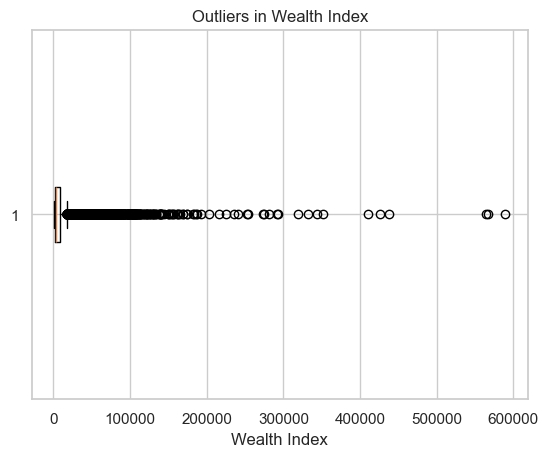

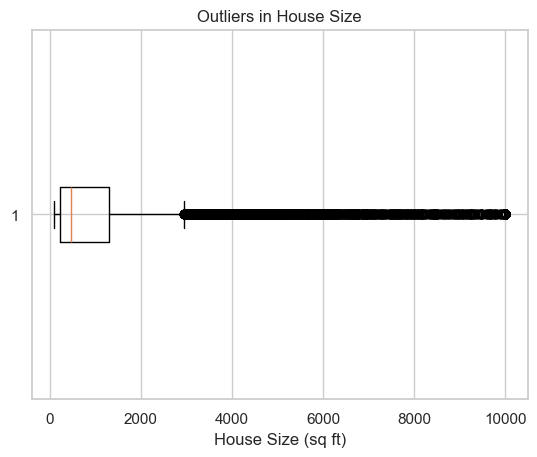

In [22]:

plt.figure()
plt.boxplot(df['Wealth_Index'], vert=False)
plt.title("Outliers in Wealth Index")
plt.xlabel("Wealth Index")
plt.show()

plt.figure()
plt.boxplot(df['House_Size_sq_ft'], vert=False)
plt.title("Outliers in House Size")
plt.xlabel("House Size (sq ft)")
plt.show()


*Z-Score Based Outlier Detection*

In [23]:

z_scores = np.abs(stats.zscore(
    df[['Wealth_Index','House_Size_sq_ft','Life_Expectancy']]
))

(pd.DataFrame(z_scores, columns=['Wealth_Index','House_Size_sq_ft','Life_Expectancy']) > 3).sum()


Wealth_Index        246
House_Size_sq_ft    626
Life_Expectancy     337
dtype: int64

**Univariate Analysis**

*Wealth Index Distribution*

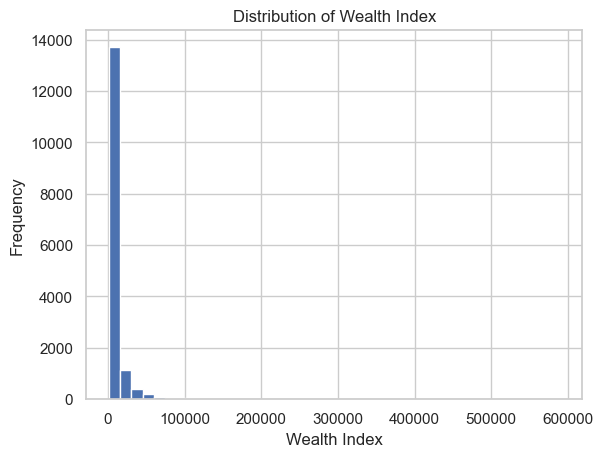

In [24]:
plt.figure()
plt.hist(df['Wealth_Index'], bins=40)
plt.xlabel("Wealth Index")
plt.ylabel("Frequency")
plt.title("Distribution of Wealth Index")
plt.show()


*Life Expectancy Distribution*

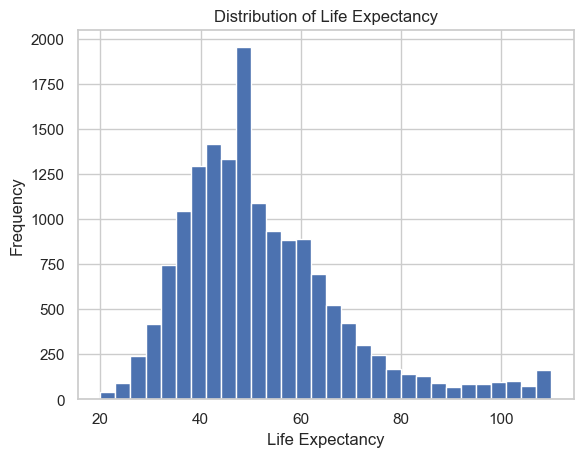

In [25]:
plt.figure()
plt.hist(df['Life_Expectancy'], bins=30)
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")
plt.show()


*House Size Distribution*

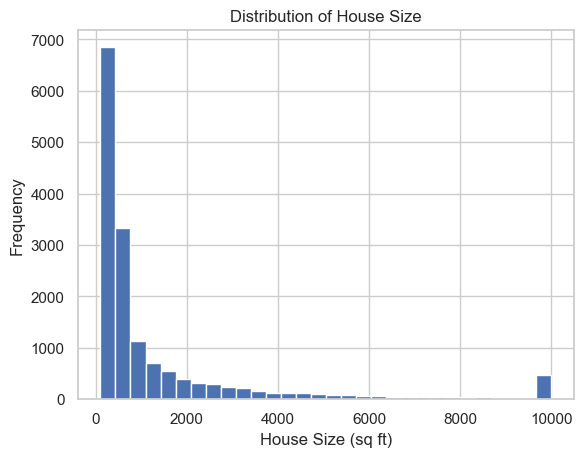

In [26]:
plt.figure()
plt.hist(df['House_Size_sq_ft'], bins=30)
plt.xlabel("House Size (sq ft)")
plt.ylabel("Frequency")
plt.title("Distribution of House Size")
plt.show()

*Occupation Distribution*

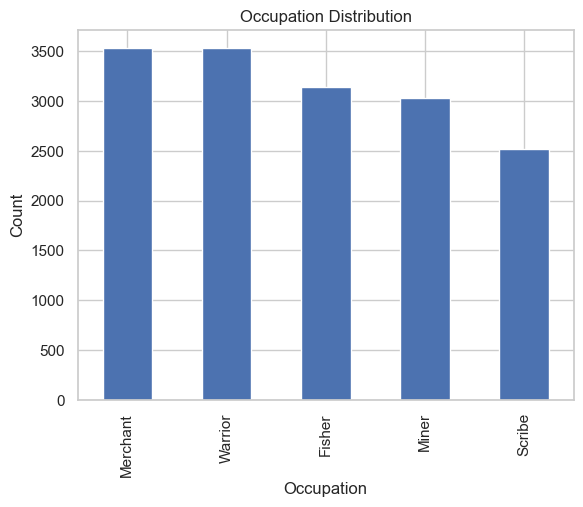

In [27]:
df['Occupation'].value_counts().plot(kind='bar')
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation Distribution")
plt.show()


*Data Transformation*

In [28]:
if 'Wealth_per_sqft' not in df.columns:
    df['Wealth_per_sqft'] = df['Wealth_Index'] / df['House_Size_sq_ft']

district_avg = df.groupby('District_Name')['Wealth_Index'].transform('mean')
df['Relative_Wealth'] = df['Wealth_Index'] - district_avg

df.head()

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash,Wealth_per_sqft,Relative_Wealth
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce,14.910000,-1909.107166
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef,15.960000,-1804.107166
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296,7.356473,-4310.445157
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,3794.5,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e,27.900735,-939.650234
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2,9.721287,21250.849766


In [29]:

df_log = df.copy()

log_positive_cols = [
    'Wealth_Index',
    'House_Size_sq_ft',
    'Wealth_per_sqft'
]

for col in log_positive_cols:
    df_log[col] = np.log1p(df_log[col])

df_log.head()


,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash,Wealth_per_sqft,Relative_Wealth
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,7.307873,4.615121,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce,2.766948,-1909.107166
1,CIT_11623,Seafood,Coral Slums,Fisher,7.375882,4.615121,49.0,Sea Scooter,Deep Trench,72f48eef,2.830858,-1804.107166
2,CIT_8026,Seafood,Mariana Plaza,Warrior,8.274357,6.280396,37.0,Sea Scooter,Deep Trench,0abde296,2.123036,-4310.445157
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,8.241571,4.919981,38.0,Fin Bicycle,Deep Trench,8055fc9e,3.363867,-939.650234
4,CIT_0275,Seaweed,Deep Trench,Warrior,10.165313,7.891331,54.0,Sea Scooter,Deep Trench,c77829e2,2.372231,21250.849766


In [30]:

df_log['Relative_Wealth'] = np.sign(df_log['Relative_Wealth']) *                             np.log1p(np.abs(df_log['Relative_Wealth']))

df_log.head()


,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash,Wealth_per_sqft,Relative_Wealth
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,7.307873,4.615121,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce,2.766948,-7.554915
1,CIT_11623,Seafood,Coral Slums,Fisher,7.375882,4.615121,49.0,Sea Scooter,Deep Trench,72f48eef,2.830858,-7.498375
2,CIT_8026,Seafood,Mariana Plaza,Warrior,8.274357,6.280396,37.0,Sea Scooter,Deep Trench,0abde296,2.123036,-8.369028
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,8.241571,4.919981,38.0,Fin Bicycle,Deep Trench,8055fc9e,3.363867,-6.846571
4,CIT_0275,Seaweed,Deep Trench,Warrior,10.165313,7.891331,54.0,Sea Scooter,Deep Trench,c77829e2,2.372231,9.964199


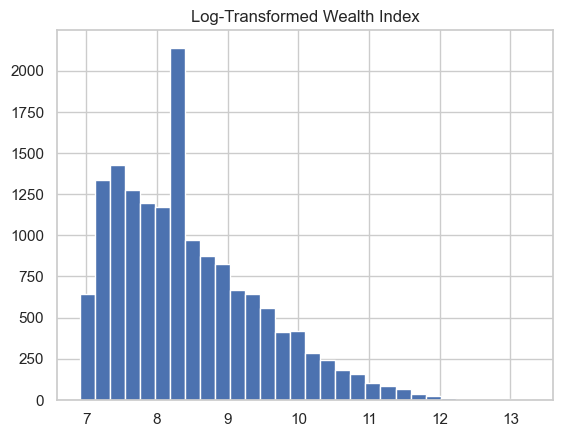

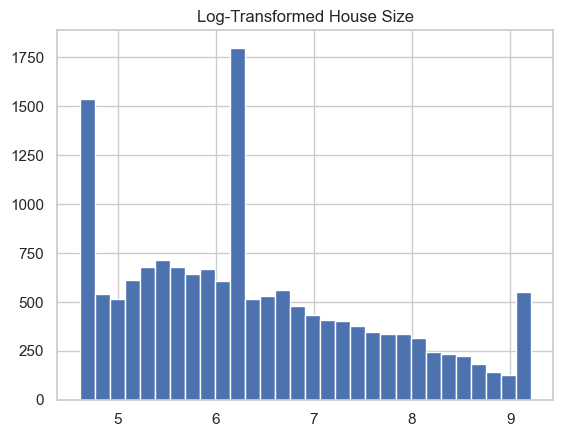

In [31]:

plt.figure()
plt.hist(df_log['Wealth_Index'], bins=30)
plt.title("Log-Transformed Wealth Index")
plt.show()

plt.figure()
plt.hist(df_log['House_Size_sq_ft'], bins=30)
plt.title("Log-Transformed House Size")
plt.show()


*Standard Scaling after Log Transformation*

In [32]:

scale_cols = [
    'Wealth_Index',
    'House_Size_sq_ft',
    'Wealth_per_sqft',
    'Life_Expectancy',
    'Relative_Wealth'
]

scaler = StandardScaler()
df_log[scale_cols] = scaler.fit_transform(df_log[scale_cols])

df_log[scale_cols].head()


,Wealth_Index,House_Size_sq_ft,Wealth_per_sqft,Life_Expectancy,Relative_Wealth
0,-1.104186,-1.408281,1.043814,-0.603059,-0.527023
1,-1.037468,-1.408281,1.164470,-0.172295,-0.519401
2,-0.156057,-0.063451,-0.171830,-0.910747,-0.636776
3,-0.188219,-1.162084,2.170742,-0.849209,-0.431530
4,1.698987,1.237495,0.298627,0.135394,1.834760


**MultiVariate Analysis**

*Wealth vs Life Expectancy*

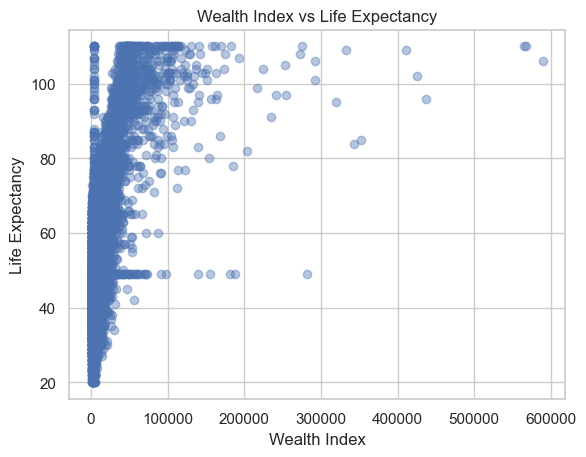

In [33]:
plt.figure()
plt.scatter(df['Wealth_Index'], df['Life_Expectancy'], alpha=0.4)
plt.xlabel("Wealth Index")
plt.ylabel("Life Expectancy")
plt.title("Wealth Index vs Life Expectancy")
plt.show()

*House Size vs Life Expectancy*

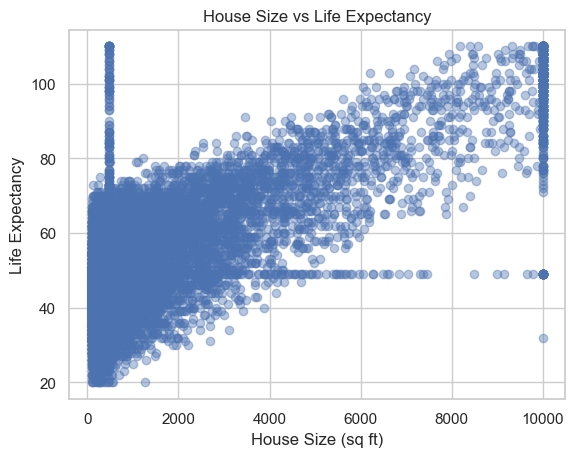

In [34]:
plt.figure()
plt.scatter(df['House_Size_sq_ft'], df['Life_Expectancy'], alpha=0.4)
plt.xlabel("House Size (sq ft)")
plt.ylabel("Life Expectancy")
plt.title("House Size vs Life Expectancy")
plt.show()

*Wealth by District*

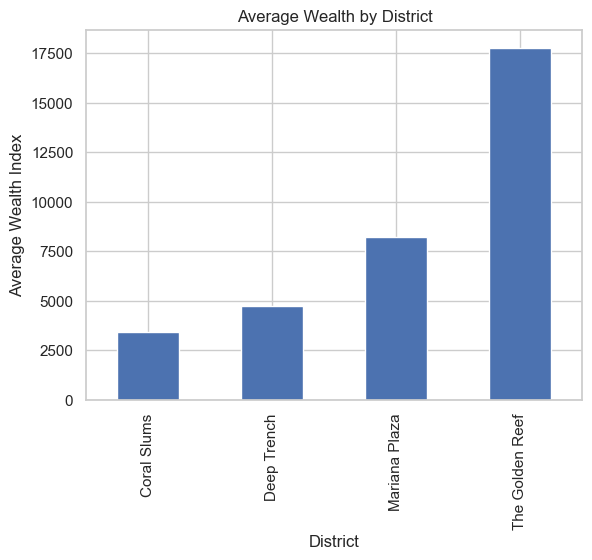

In [35]:
df.groupby('District_Name')['Wealth_Index'].mean().plot(kind='bar')
plt.xlabel("District")
plt.ylabel("Average Wealth Index")
plt.title("Average Wealth by District")
plt.show()


*Correlation Matrix*

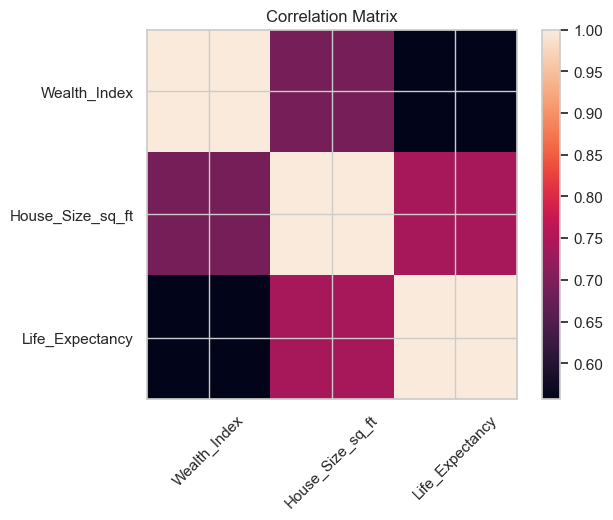

In [36]:
corr = df[['Wealth_Index','House_Size_sq_ft','Life_Expectancy']].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


*Scatter Matrix*

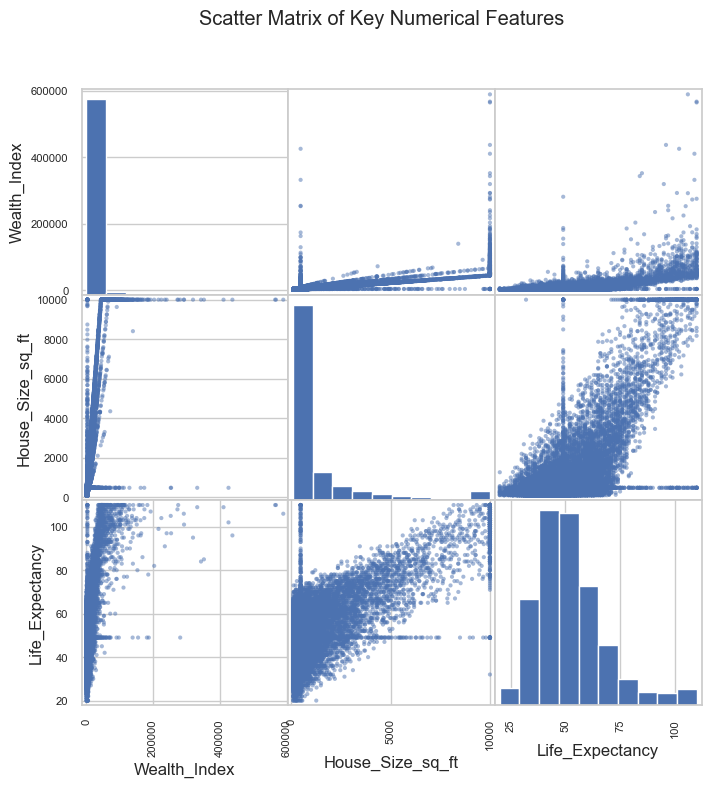

In [37]:
scatter_matrix(
    df[['Wealth_Index','House_Size_sq_ft','Life_Expectancy']],
    figsize=(8,8)
)
plt.suptitle("Scatter Matrix of Key Numerical Features")
plt.show()

*District wise Commute-out Percentage & Occupation Relation*

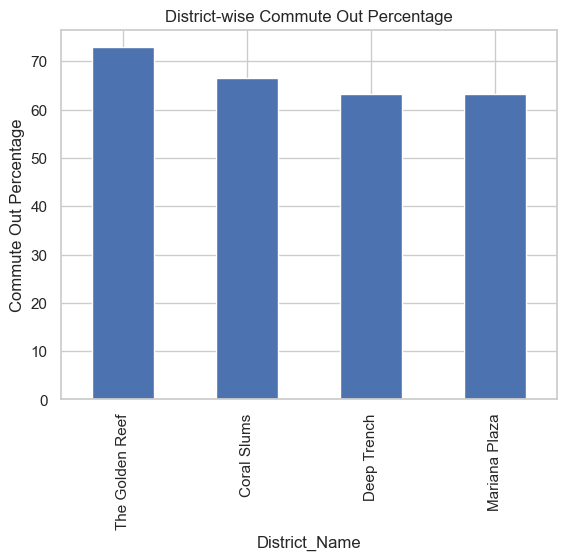

In [38]:

df['Commutes_Out'] = df['District_Name'] != df['Work_District']

district_commute = df.groupby('District_Name')['Commutes_Out'].mean().sort_values(ascending=False) * 100

plt.figure()
district_commute.plot(kind='bar')
plt.ylabel("Commute Out Percentage")
plt.title("District-wise Commute Out Percentage")
plt.show()


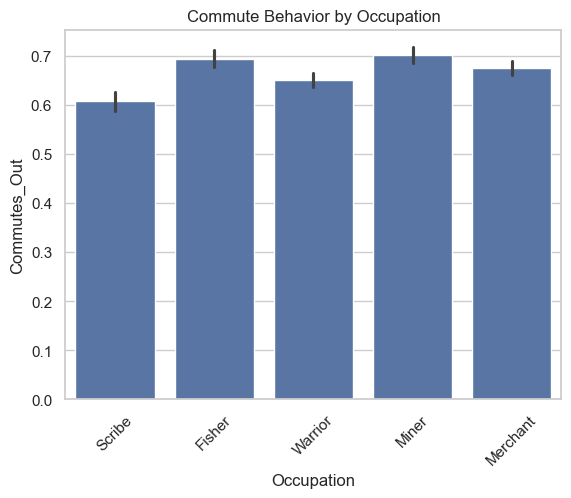

In [39]:

plt.figure()
sns.barplot(
    data=df,
    x='Occupation',
    y='Commutes_Out',
    estimator=np.mean
)
plt.xticks(rotation=45)
plt.title("Commute Behavior by Occupation")
plt.show()


*Wealthiest vs Poorest Districts*

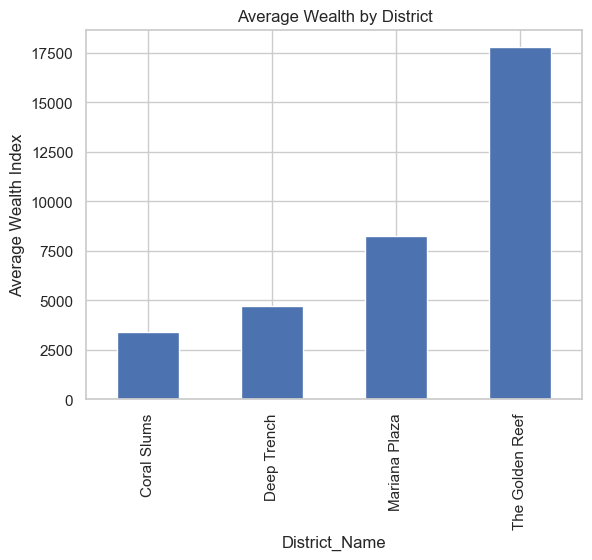

np.float64(5.228407287711397)

In [40]:

avg_wealth = df.groupby('District_Name')['Wealth_Index'].mean().sort_values()

plt.figure()
avg_wealth.plot(kind='bar')
plt.ylabel("Average Wealth Index")
plt.title("Average Wealth by District")
plt.show()

avg_wealth.max() / avg_wealth.min()


*House Size vs Life Expectancy*

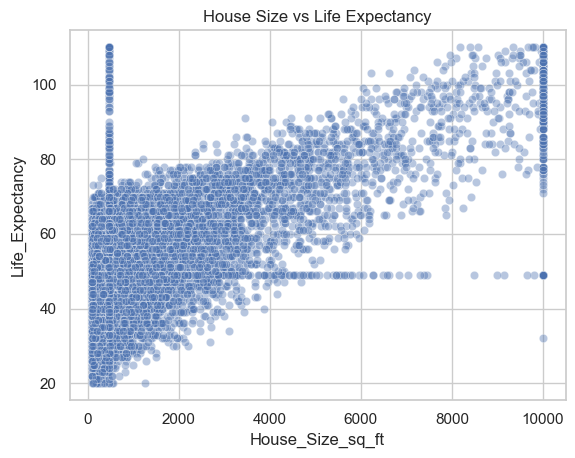

np.float64(0.7407297067201173)

In [41]:

plt.figure()
sns.scatterplot(
    data=df,
    x='House_Size_sq_ft',
    y='Life_Expectancy',
    alpha=0.4
)
plt.title("House Size vs Life Expectancy")
plt.show()

df['House_Size_sq_ft'].corr(df['Life_Expectancy'])


*Income vs Dietary Impact*

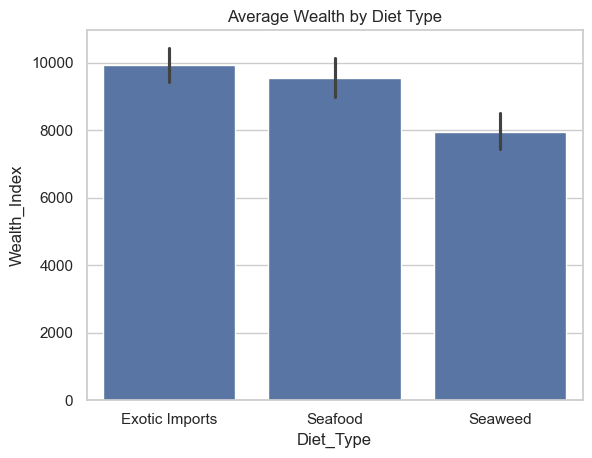

In [42]:

plt.figure()
sns.barplot(
    data=df,
    x='Diet_Type',
    y='Wealth_Index',
    estimator=np.mean
)
plt.title("Average Wealth by Diet Type")
plt.show()


*Bio-Hash Significance w.r.t Occupation*

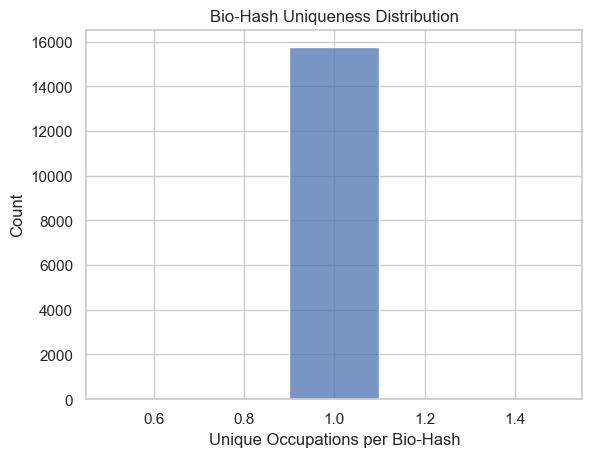

Occupation
1    15751
Name: count, dtype: int64

In [43]:

bio_hash_uniqueness = df.groupby('Bio_Hash')['Occupation'].nunique()

plt.figure()
sns.histplot(bio_hash_uniqueness, bins=5)
plt.xlabel("Unique Occupations per Bio-Hash")
plt.title("Bio-Hash Uniqueness Distribution")
plt.show()

bio_hash_uniqueness.value_counts()


*Vehicle Ownership vs Wealth*

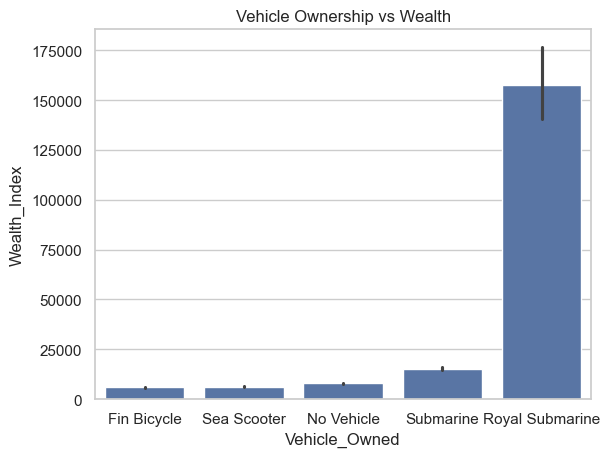

In [44]:

plt.figure()
sns.barplot(
    data=df,
    x='Vehicle_Owned',
    y='Wealth_Index',
    estimator=np.mean
)
plt.title("Vehicle Ownership vs Wealth")
plt.show()


*Occupation vs Life Expectancy*

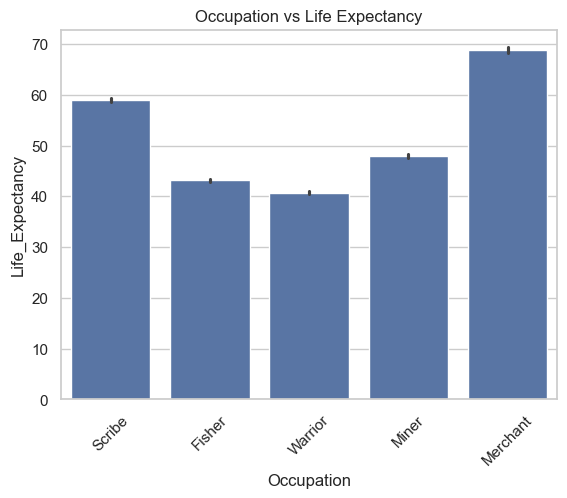

In [45]:

plt.figure()
sns.barplot(
    data=df,
    x='Occupation',
    y='Life_Expectancy',
    estimator=np.mean
)
plt.xticks(rotation=45)
plt.title("Occupation vs Life Expectancy")
plt.show()


*District vs Average House Size*

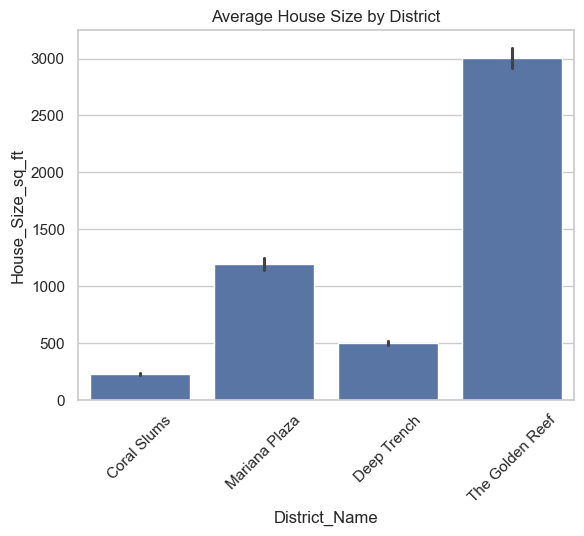

In [46]:

plt.figure()
sns.barplot(
    data=df,
    x='District_Name',
    y='House_Size_sq_ft',
    estimator=np.mean
)
plt.xticks(rotation=45)
plt.title("Average House Size by District")
plt.show()


*Commuting Status vs Wealth*

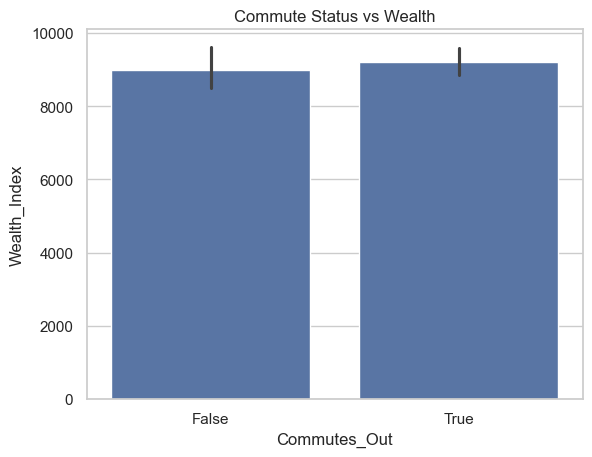

In [47]:

plt.figure()
sns.barplot(
    data=df,
    x='Commutes_Out',
    y='Wealth_Index',
    estimator=np.mean
)
plt.title("Commute Status vs Wealth")
plt.show()


*Wealth Distribution Spread Across Districts*

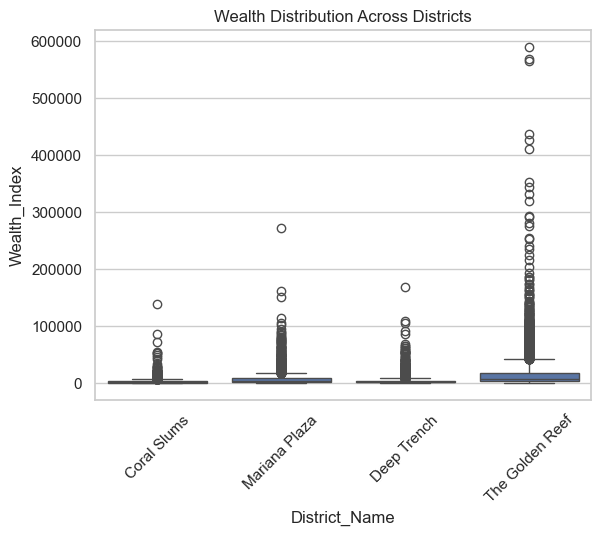

In [49]:

plt.figure()
sns.boxplot(
    data=df,
    x='District_Name',
    y='Wealth_Index'
)
plt.xticks(rotation=45)
plt.title("Wealth Distribution Across Districts")
plt.show()


*Diet vs Life Expectancy*

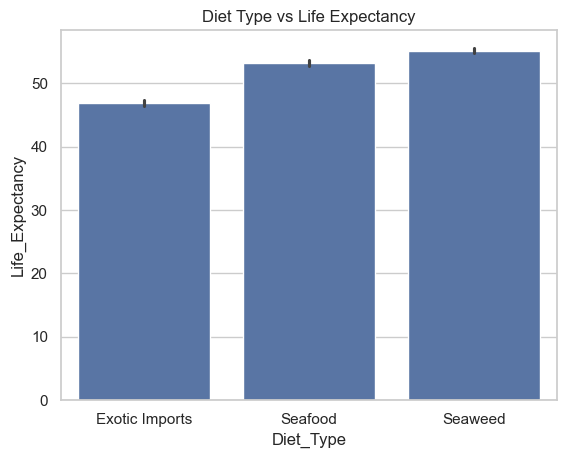

In [50]:

plt.figure()
sns.barplot(
    data=df,
    x='Diet_Type',
    y='Life_Expectancy',
    estimator=np.mean
)
plt.title("Diet Type vs Life Expectancy")
plt.show()


*Pairplot of Key Numerical Variables*

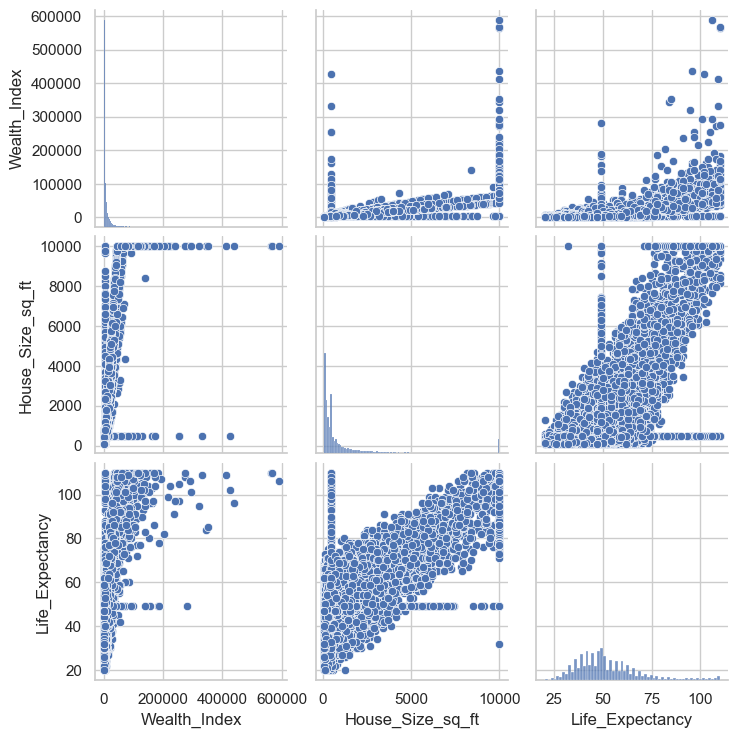

In [51]:

sns.pairplot(
    df[['Wealth_Index','House_Size_sq_ft','Life_Expectancy']]
)
plt.show()


*Correlation Heatmap*

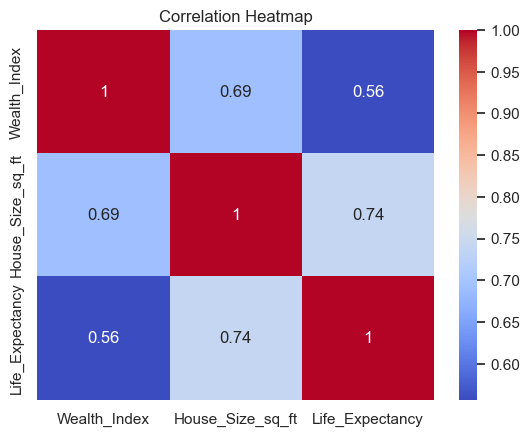

In [52]:

plt.figure()
sns.heatmap(
    df[['Wealth_Index','House_Size_sq_ft','Life_Expectancy']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()
